<a href="https://colab.research.google.com/github/linapaolap/linapaolap/blob/main/ejercicio_limpieza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando librerías y guardando nuestro dataset en una variable. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1DjrIHvas8Z5XOEID0y_xynbt-eaKMcG2/export?format=csv")

# **SOBRE EL SET DE DATOS**

Corresponde a los lugares de producción de energía solar más grandes del planeta.

Posee las siguientes columnas
1. **Name:** El nombre de esta planta solar. Dato tipo String
2. **Country:** País de ubicación de dicha planta. Dato tipo String.
3. **MegawattsCapacity**: Capacidad de energía que es capaz de producir. Dato númerico. 
4. **Acres**: Medida agraria de superficie del sistema anglosajón que equivale a 4046 metros cuadrados.
5. **Sq Mi**: Extensión de la planta en millas. Dato númerico.
6. **Sq Km**: Extensión de la planta en kilómetros. Dato númerico.
7. **Yer(Year)**: Año en que fue culminada su construcción. Dato tipo String. 
8. **Type:** Tipo de planta conforme a su paisaje. 

# LIMPIEZA DE DATOS

Antes de analizar, manipular y visualizar datos, es importante en primera 
medida realizar una limpieza de estos. Esto corresponde a eliminar datos 
idénticos, a corregir errores tipógraficos que duplican o hasta triplican las categorías halladas en una columna y suman *arrows* innesarias a nuestro set, también de datos númericos anormales y fuera de sentido (*por ejemplo, que en el set haya alguien con edad de 200 años*), o simplemente la intrusión de caracteres especiales que empañen la debida presentación y escritura de un dato.

*Primer método*: 

```
.head() 

```
Permite conocer las primeras filas de nuestro set, en el parámetro () podemos pasar el número de filas que deseamos ver, sin embargo, si no pasamos ninguna, po defecto mostrará las primeras 5 filas del set. Veamos si decidimos solo ver las 3 primeras filas:


In [ ]:
df.head(3)

,Name,Country,Sq Mi,Sq Km,MegawattsCapacity,Acres,yer,Type
0,Bhadla Solar ParkQ@,India,21.0,54.4,2245,14000,2020,Park
1,Huanghe Hydropower Hainan Solar Park,China,2.2,5.7,2200,1408,2020,Park
2,Pavagada Solar Park,India,20.3,52.6,2050,13000,2019,Park


Ahora por defecto sería: 

In [ ]:
df.head()

,Name,Country,Sq Mi,Sq Km,MegawattsCapacity,Acres,yer,Type
0,Bhadla Solar ParkQ@,India,21.0,54.4,2245,14000,2020,Park
1,Huanghe Hydropower Hainan Solar Park,China,2.2,5.7,2200,1408,2020,Park
2,Pavagada Solar Park,India,20.3,52.6,2050,13000,2019,Park
3,Benban Solar Park#,Egypt,14.4,37.3,1650,9216,2019,Park
4,Tengger Desert Solar Park,China,16.6,43.0,1547,10625,2016,Park


Ahora, si queremos conocer sólo las columnas de nuestro set ```.columns``` será el método adecuado:



In [ ]:
df.columns

Index(['Name', 'Country', 'Sq Mi', 'Sq Km', 'MegawattsCapacity', 'Acres',
       'yer', 'Type'],
      dtype='object')

Bueno, pero hemos notado que nuestro set en la columna *Name* hay unos caracteres como '@'y '#' que no hacen sentido en los nombres de las plantas solares. Por tanto, podemos usar ```.replace``` junto a una expresión regular (regex) para reemplazar estos datos con un vacío. lo cual se vería de la siguiente forma: 



In [ ]:
df["Name"] = df["Name"].replace({'@':'', '#':''}, regex=True)

Guardamos la columna *Name* dentro de la misma variable que representa al set, porque queremos que se sobreescriba y guarde esta modificación, y le ponemos *True* a la especificación del regex porque estamos usando una expresión de estas. En caso de no hacerlo, pondremos *False*.

Ahora volvamos a ver el set y observar como desparecieron estos caracteres:

In [ ]:
df.head()

,Name,Country,Sq Mi,Sq Km,MegawattsCapacity,Acres,yer,Type
0,Bhadla Solar ParkQ,India,21.0,54.4,2245,14000,2020,Park
1,Huanghe Hydropower Hainan Solar Park,China,2.2,5.7,2200,1408,2020,Park
2,Pavagada Solar Park,India,20.3,52.6,2050,13000,2019,Park
3,Benban Solar Park,Egypt,14.4,37.3,1650,9216,2019,Park
4,Tengger Desert Solar Park,China,16.6,43.0,1547,10625,2016,Park


Con este método .`shape` podremos ver primero el número de filas y luego el número de columnas. 

In [ ]:
df.shape

(22, 8)

No obstante, con `.info` podremos ver la misma información anterior junto a los tipos de datos y tipo de valores. Es útil porque podemos verificar como se están leyendo nuestros datos y si hay algún dato nulo. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               22 non-null     object 
 1   Country            22 non-null     object 
 2   Sq Mi              22 non-null     float64
 3   Sq Km              22 non-null     float64
 4   MegawattsCapacity  22 non-null     int64  
 5   Acres              22 non-null     int64  
 6   yer                22 non-null     int64  
 7   Type               22 non-null     object 
dtypes: float64(2), int64(3), object(3)
memory usage: 1.5+ KB


Ahora. hemos notado que *'yer'* aún no es corregida por *'Year'*. Esta vez, usaremos el `.rename` que es para renombrar las columnas de nuestro data set. 

In [ ]:
df.rename(columns = {'yer': 'Year'}, inplace=True)

y observemos como cambió:

In [ ]:
df.head()

,Name,Country,Sq Mi,Sq Km,MegawattsCapacity,Acres,Year,Type
0,Bhadla Solar ParkQ,India,21.0,54.4,2245,14000,2020,Park
1,Huanghe Hydropower Hainan Solar Park,China,2.2,5.7,2200,1408,2020,Park
2,Pavagada Solar Park,India,20.3,52.6,2050,13000,2019,Park
3,Benban Solar Park,Egypt,14.4,37.3,1650,9216,2019,Park
4,Tengger Desert Solar Park,China,16.6,43.0,1547,10625,2016,Park


Ahora, podemos tener datos duplicados, es decir, idénticos, plantas solares con los mismos datos. Para corregir esto podemos verificar con `.shape` cuantos datos habian, eliminar los duplicados con `.drop_duplicates` con `implace=True` reescribir el dataset con este cambio, y finalmente con .shape volver a verificar cuantas filas quedaron:

In [ ]:
#Eliminar filas  de datos identicos en todas las columnas
print(f"Tamaño del data set antes de elimar filas repetidas: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Tamaño del data set después de eliminar filas repetidas: {df.shape}")


Tamaño del data set antes de elimar filas repetidas: (22, 8)
Tamaño del data set después de eliminar filas repetidas: (20, 8)


Efectivamente, habían dos filas con datos idénticos. 

Ahora podemos observar en las *columnas categóricas* (de tipo String), cuántos tipos de categorías hay por cada columna, es decir, cuántos paises diferentes, o tipos de plantas solares distintos se encuentran . Para ellos primero separamos en una variabble las columnas categóricas, luego con un for y el método `.nunique()`, nos muestra el resultado.

In [ ]:
# Tipos de categorías en columnas tipo categóricas
columns_cat = ['Name', 'Country', 'Type']
for column in columns_cat:
  print(f'Columna {column}: {df[column].nunique()} categorías')

Columna Name: 20 categorías
Columna Country: 9 categorías
Columna Type: 5 categorías


Sabiendo esto, será suficiente para descartar que no haya ninguna categoría repetida? Lo mejor será gráficar, esta vez con seaborn(librería) y evidenciar de manera más visual si hay algo que corregir en estas columnas. 

Pasamos los parámetros de dimensión del gráfico y el espaciado. Luego con un for recorremos las columnas dentro de `columns_cat` y aplicamos el método de graficación de conteo en barras.

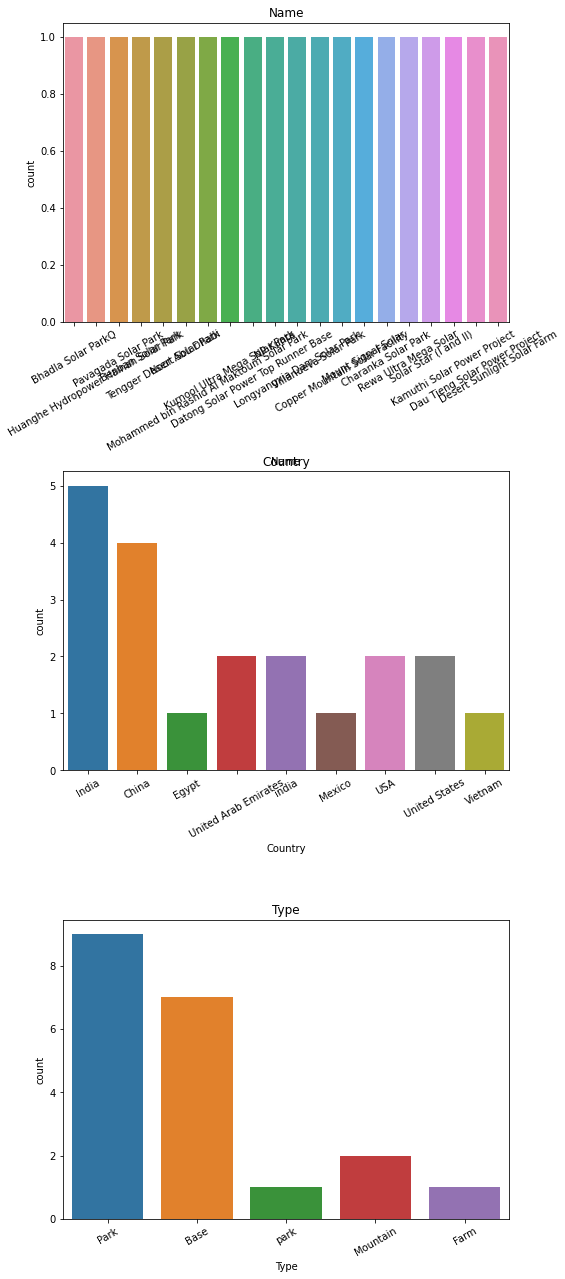

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,22))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_cat):
  sns.countplot(x=column, data=df, ax=ax[i])
  ax[i].set_title(column)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Encontramos que hay datos repetidos tanto porque están escritos diferente en cuánto a mayúscula y miníscula, y otros por formas de abreviación. Para el caso de las mayúsculas y minísculas, podemos pasar todos los datos a miniscula mediante el método de manipulación de strings `.str.lower()`, con un for de igual manera, pues ya tenemos nuestras columnas categóricas en una variable. 

In [ ]:
for column in columns_cat:
  df[column] = df[column].str.lower() 

Volvemos a graficar y evidenciamos los cambios. Ahora *park* e *india* están en minisculas y agrupados en el mismo conteo. 

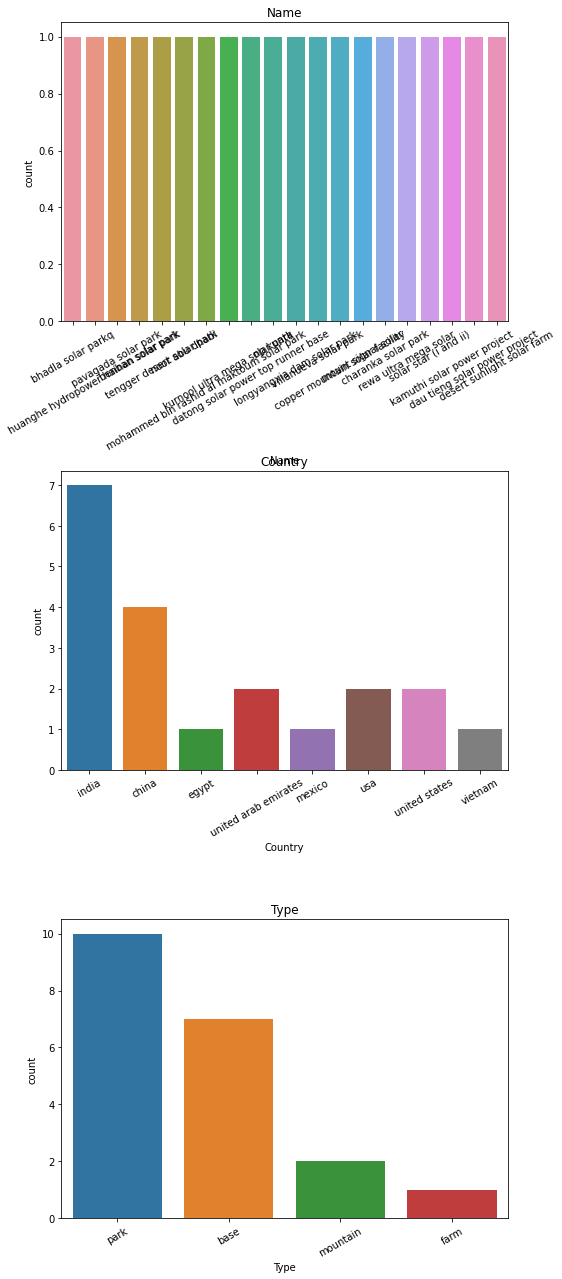

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,22))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_cat):
  sns.countplot(x=column, data=df, ax=ax[i])
  ax[i].set_title(column)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Ahora veamos cómo disminuyeron las categorías que eran tomadas como dobles al tener diferentes escrituras con miniscula y mayúscula:

In [ ]:
# Tipos de categorías en columnas tipo categóricas después de limpieza tipográfica
columns_cat = ['Name', 'Country', 'Type']
for column in columns_cat:
  print(f'Columna {column}: {df[column].nunique()} categorías')

Columna Name: 20 categorías
Columna Country: 8 categorías
Columna Type: 4 categorías


Sin embargo... siguen existiendo duplicados de origen tipógrafico, resulta que *'usa'* es también *'united states'*. Por tanto, usaremos ahora el mismo `.replace.`

In [ ]:
df["Country"] = df["Country"].replace({'united states':'usa'}, regex=True)

Grafiquemos de nuevo y veriquemos que no estará repetido nuevamente: 

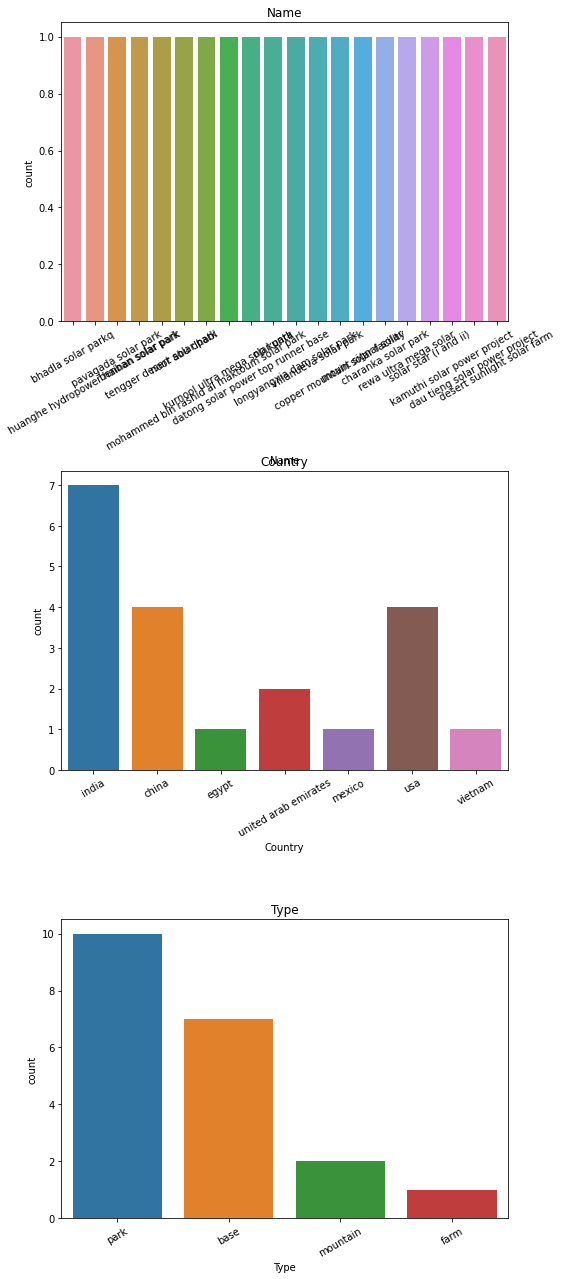

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,22))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_cat):
  sns.countplot(x=column, data=df, ax=ax[i])
  ax[i].set_title(column)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Muy bien, ahora sí veamos cuántas categorías por columna quedaron al final y si coinciden con la última gráfica actualizada de arriba: 

In [ ]:
columns_cat = ['Name', 'Country', 'Type']
for column in columns_cat:
  print(f'Columna {column}: {df[column].nunique()} categorías')

Columna Name: 20 categorías
Columna Country: 7 categorías
Columna Type: 4 categorías


Perfecto, hemos terminado nuestra limpieza de datos categóricos o de texto. Ahora... podemos ver aquellos datos atípicos en los datos de tipo número.

Con `.describe` podemos ver datos estadísticos principales sobre las columnas de tipo númerico 

In [ ]:
df.describe()

,Sq Mi,Sq Km,MegawattsCapacity,Acres,Year
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,9.935000,27.540000,1110.950000,6394.050000,2017.600000
std,7.399735,18.794887,532.657437,4776.909786,2.326054
min,1.900000,5.700000,550.000000,1245.000000,2012.000000
25%,4.725000,15.075000,780.000000,3025.000000,2016.000000
50%,8.450000,24.500000,914.000000,5426.000000,2018.000000
75%,12.600000,38.200000,1269.500000,8064.000000,2019.250000
max,30.000000,77.700000,2245.000000,19200.000000,2021.000000


Una forma de observar que no haya un solo tipo de dato en una columna, es observar la desviación estándar, si está en 0, significa que tenemos un solo valor en esta columna. Sin embargo, en este caso podemos observar que no es así. 

Ahora, para entender de forma más concreta si se encuentra un dato atípico en los datos de tipo númerico del dataset, podemos también graficar con la librería *seaborn* que importamos y evidenciar los datos cuestionables en nuestro set. 

Primero guardaremos en una variable las columnas de tipo numerico, y así luego usaremos la librería

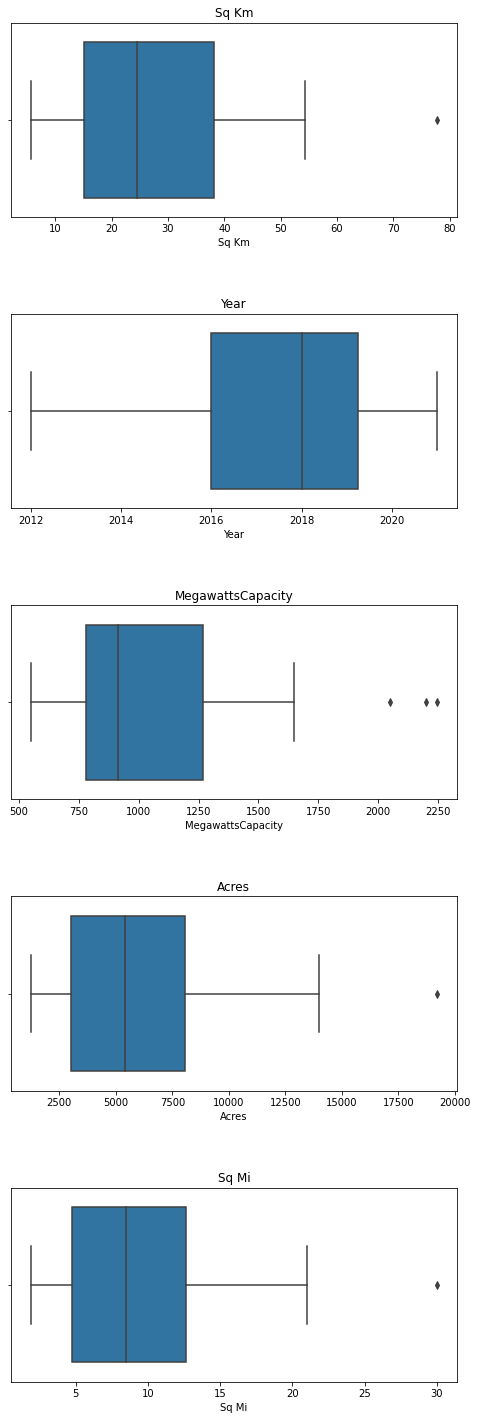

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
columns_num = ['Sq Km', 'Year', 'MegawattsCapacity', 'Acres', 'Sq Mi']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8,25))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_num):
    sns.boxplot(x=column, data=df, ax=ax[i])
    ax[i].set_title(column)

En este caso, aunque hay datos que se ubican por fuera del gráfico de caja, puede ser perfectamente posible que hayan plantas solares con mayor capacidad y con mayor extensión, pues la diferencia no es descomunal ni alocada frente a la mayoría.

En caso de que si existan valores atípicos, por ejemplo si existe un año como el *2091* en nuestro columna *Year*, que no es posible que exista tal información porque aún no hemos llegado a este año. Podemos inferir que a lo mejor buscaban ingresar el 2019, y reemplazar este dato (ya sabes con `.replace`). Como analista, debemos tratar de conservar la información e investigar si es posible corregir y reemplazar estos datos erroneos en el dataset, pues en el resto de columnas puede haber información que si sea de utilidad. 

Pero si finalmnete no es posible corregir esta información, y tenemos otros datos suficientes  para hacer el análisis. Podemos eliminarlo usando un código condicional y guardando los cambios en el mismo dataset y columna: 


```
print(f'Tamaño del set antes de eliminar registros de edad: {df.shape}')
df = df[df['Year']<=2023]
print(f'Tamaño del set después de eliminar registros de edad: {df.shape}')
```




Puedes practicar con otros datasets. También estudiar sobre otras cosas que se pueden hacer para graficar con **Seaborn** o con **Maplotlib**. 

Desarrollado por: Lina Paola Perdomo @linapaper